In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = make_blobs(n_samples=20, centers=[[1,1], [4,4]])

In [3]:
data

(array([[ 2.88126408e+00,  3.90248247e+00],
        [ 2.76710576e+00,  5.85105931e+00],
        [ 5.07492423e+00,  3.78565808e+00],
        [ 3.74832238e+00,  4.92334291e+00],
        [ 9.64918863e-01,  1.38840025e+00],
        [ 6.00938494e-01,  1.89170567e+00],
        [-1.59424281e-03,  1.55322309e+00],
        [ 8.35743864e-01, -6.08499922e-01],
        [ 7.03479390e-01, -1.05661232e-01],
        [ 3.77088187e+00,  4.64649110e+00],
        [ 2.64107206e-01,  2.19293536e+00],
        [ 4.51006404e+00,  3.58076923e+00],
        [-9.01966869e-01, -9.25512824e-01],
        [ 5.63236978e+00,  2.87373117e+00],
        [ 4.92362500e+00,  2.56398083e+00],
        [ 3.93782810e+00,  2.41269671e+00],
        [ 1.05880517e-01,  4.25904263e-01],
        [ 4.25525125e+00,  4.63935690e+00],
        [ 1.76045068e+00,  1.06961890e+00],
        [ 1.20905494e+00,  1.07405868e+00]]),
 array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]))

In [4]:
df = pd.DataFrame(data[0], columns = ["X", "Y"])
df["Target"] = data[1]

In [5]:
df.head()

,X,Y,Target
0,2.881264,3.902482,1
1,2.767106,5.851059,1
2,5.074924,3.785658,1
3,3.748322,4.923343,1
4,0.964919,1.388400,0


In [6]:
X = data[0]
y = data[1]

In [7]:
a = df[df["Target"]==0]
b = df[df["Target"]==1]

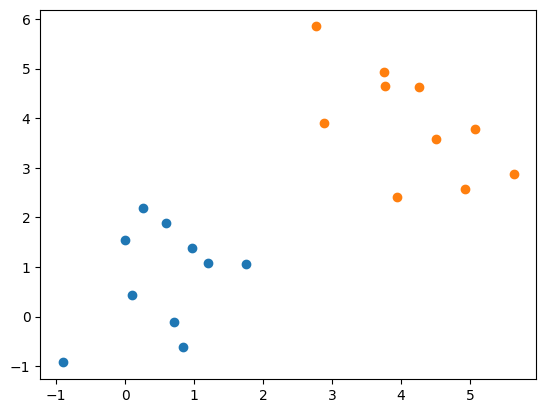

In [8]:
plt.scatter(a["X"], a["Y"])
plt.scatter(b["X"], b["Y"])
plt.show()

In [9]:
k=2

In [10]:
c0 = np.array([0,2.3])
c1 = np.array([5,5.2])

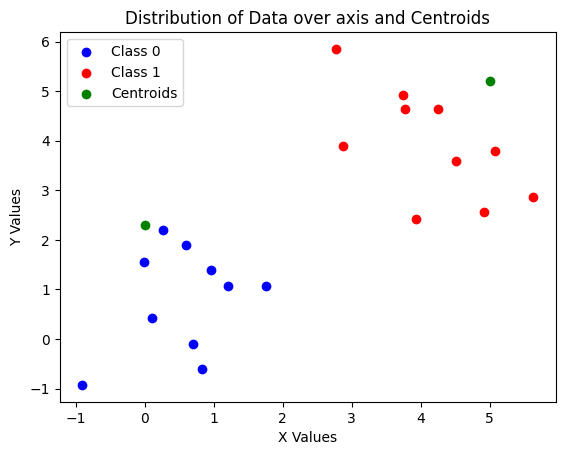

In [11]:
plt.scatter(a["X"], a["Y"], color="blue", label="Class 0")
plt.scatter(b["X"], b["Y"], color="red", label="Class 1")
plt.scatter([0, 5], [2.3, 5.2], color="green", label="Centroids")
plt.legend()
plt.title("Distribution of Data over axis and Centroids")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

In [12]:
c0 - df.iloc[0,:2]

X   -2.881264
Y   -1.602482
Name: 0, dtype: float64

In [13]:
np.sqrt(np.sum(np.square(c0 - df.iloc[0,:2])))

3.296912606940008

In [14]:
# c0 ---> 0, 2.3
# df ---> 0.283606 , 2.440384	
x1 = 0
y1 = 2.3
x2 = 0.283606
y2 = 2.440384

In [15]:
np.sqrt(((x2-x1)**2)+((y2-y1)**2))

0.3164490965258078

In [16]:
dist_c0 = np.sqrt(np.square(c0[0]-df["X"]) + np.square(c0[1]-df["Y"]))

dist_c1 = np.sqrt(np.square(c1[0]-df["X"]) + np.square(c1[1]-df["Y"]))

In [17]:
new_df = df

In [18]:
new_df["dist_c0"] = dist_c0
new_df["dist_c1"] = dist_c1

In [19]:
new_df

,X,Y,Target,dist_c0,dist_c1
0,2.881264,3.902482,1,3.296913,2.484470
1,2.767106,5.851059,1,4.501877,2.325875
2,5.074924,3.785658,1,5.287914,1.416325
3,3.748322,4.923343,1,4.575134,1.281888
4,0.964919,1.388400,0,1.327435,5.550691
5,0.600938,1.891706,0,0.726520,5.504231
6,-0.001594,1.553223,0,0.746779,6.189905
7,0.835744,-0.608500,0,3.026192,7.147006
8,0.703479,-0.105661,0,2.506410,6.827161
9,3.770882,4.646491,1,4.441348,1.348000


In [20]:
np.argmin(new_df[["dist_c0", "dist_c1"]].loc[0])

1

In [21]:
new_class = [np.argmin(new_df[["dist_c0", "dist_c1"]].loc[i]) for i in range(20)]

In [22]:
new_class

[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

In [23]:
np.argmin([1,5,4,0,7,8,9])

3

In [24]:
np.argmax([1,5,4,0,7,8,9])

6

In [25]:
new_df["cluster"] = new_class

In [26]:
new_df

,X,Y,Target,dist_c0,dist_c1,cluster
0,2.881264,3.902482,1,3.296913,2.484470,1
1,2.767106,5.851059,1,4.501877,2.325875,1
2,5.074924,3.785658,1,5.287914,1.416325,1
3,3.748322,4.923343,1,4.575134,1.281888,1
4,0.964919,1.388400,0,1.327435,5.550691,0
5,0.600938,1.891706,0,0.726520,5.504231,0
6,-0.001594,1.553223,0,0.746779,6.189905,0
7,0.835744,-0.608500,0,3.026192,7.147006,0
8,0.703479,-0.105661,0,2.506410,6.827161,0
9,3.770882,4.646491,1,4.441348,1.348000,1


In [27]:
cluster0_mean = new_df[new_df["cluster"]==0].mean()
cluster1_mean = new_df[new_df["cluster"]==1].mean()

In [28]:
new_c0 = cluster0_mean[:2]

In [29]:
new_c1 = cluster1_mean[:2]

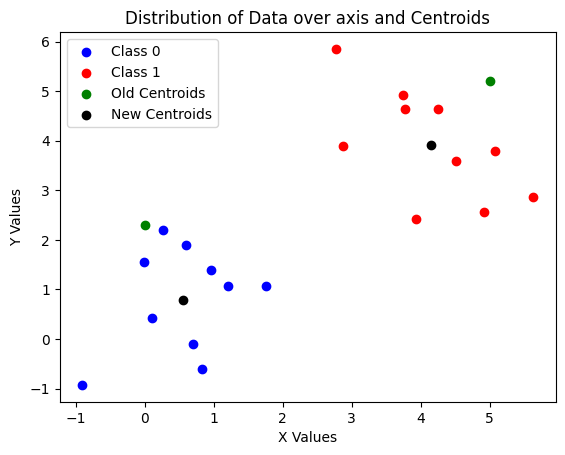

In [30]:
plt.scatter(a["X"], a["Y"], color="blue", label="Class 0")
plt.scatter(b["X"], b["Y"], color="red", label="Class 1")
plt.scatter([0, 5], [2.3, 5.2], color="green", label="Old Centroids")
plt.scatter([new_c0[0], new_c1[0]], [new_c0[1], new_c1[1]], 
            color="black", label="New Centroids")
plt.legend()
plt.title("Distribution of Data over axis and Centroids")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

In [31]:
new_dist_c0 = np.sqrt(np.square(new_c0[0]-df["X"]) + np.square(new_c0[1]-df["Y"]))

new_dist_c1 = np.sqrt(np.square(new_c1[0]-df["X"]) + np.square(new_c1[1]-df["Y"]))

In [32]:
new_df["new_dist_c0"] = new_dist_c0
new_df["new_dist_c1"] = new_dist_c1

In [33]:
new_df

,X,Y,Target,dist_c0,dist_c1,cluster,new_dist_c0,new_dist_c1
0,2.881264,3.902482,1,3.296913,2.484470,1,3.881791,1.268994
1,2.767106,5.851059,1,4.501877,2.325875,1,5.518594,2.376917
2,5.074924,3.785658,1,5.287914,1.416325,1,5.420165,0.934176
3,3.748322,4.923343,1,4.575134,1.281888,1,5.219307,1.082718
4,0.964919,1.388400,0,1.327435,5.550691,0,0.721223,4.067486
5,0.600938,1.891706,0,0.726520,5.504231,0,1.097089,4.086893
6,-0.001594,1.553223,0,0.746779,6.189905,0,0.939555,4.777977
7,0.835744,-0.608500,0,3.026192,7.147006,0,1.432085,5.610186
8,0.703479,-0.105661,0,2.506410,6.827161,0,0.913574,5.298031
9,3.770882,4.646491,1,4.441348,1.348000,1,5.017660,0.821351


In [34]:
new_class = [np.argmin(new_df[["new_dist_c0", "new_dist_c1"]].loc[i]) for i in range(20)]

In [35]:
new_df["new_cluster"] = new_class

In [36]:
new_df.head()

,X,Y,Target,dist_c0,dist_c1,cluster,new_dist_c0,new_dist_c1,new_cluster
0,2.881264,3.902482,1,3.296913,2.484470,1,3.881791,1.268994,1
1,2.767106,5.851059,1,4.501877,2.325875,1,5.518594,2.376917,1
2,5.074924,3.785658,1,5.287914,1.416325,1,5.420165,0.934176,1
3,3.748322,4.923343,1,4.575134,1.281888,1,5.219307,1.082718,1
4,0.964919,1.388400,0,1.327435,5.550691,0,0.721223,4.067486,0


In [37]:
cluster0_mean = new_df[new_df["new_cluster"]==0].mean()
cluster1_mean = new_df[new_df["new_cluster"]==1].mean()

In [38]:
new_new_c0 = cluster0_mean[:2]

In [39]:
new_new_c1 = cluster1_mean[:2]

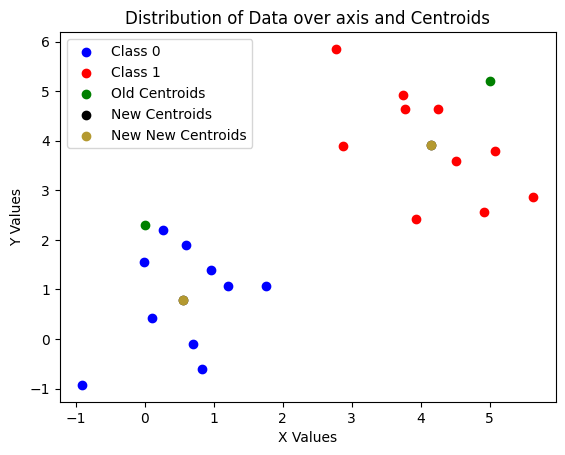

In [43]:
plt.scatter(a["X"], a["Y"], color="blue", label="Class 0")
plt.scatter(b["X"], b["Y"], color="red", label="Class 1")
plt.scatter([0, 5], [2.3, 5.2], color="green", label="Old Centroids")
plt.scatter([new_c0[0], new_c1[0]], [new_c0[1], new_c1[1]], 
            color="black", label="New Centroids")
plt.scatter([new_new_c0[0], new_new_c1[0]], [new_new_c0[1], new_new_c1[1]], 
            color="#B49930", label="New New Centroids")
plt.legend()
plt.title("Distribution of Data over axis and Centroids")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

# Black dot is overlap on new new centroid to view it comment new new centroid.